# Question 1

In [ ]:
#OASIS

def fit_batch(W, X, train, n_iter, verbose=False):
    loss_steps_batch = np.empty((n_iter,), dtype='bool')
    n_samples, n_features = X.shape

    assert(W.shape[0] == n_features)
    assert(W.shape[1] == n_features)

    for ii in xrange(n_iter):

        # Sample a query image
        p_ind = train[ii,:][0]

        # Draw random positive sample
        pos_ind = train[ii,:][1]

        # Draw random negative sample
        neg_ind = train[ii,:][2]

        p = X[p_ind]

        samples_delta = X[pos_ind] - X[neg_ind]

        p = p.toarray().reshape(-1)
        samples_delta = samples_delta.toarray().reshape(-1)

        loss = max(0, 1 - p.dot(W).dot(samples_delta))

        if loss > 0:
            # Update W
            grad_W = np.outer(p, samples_delta)

            loss_steps_batch[ii] = True

            norm_grad_W = (np.linalg.norm(p) ** 2) * (np.linalg.norm(samples_delta) ** 2)

            # constraint on the maximal update step size
            tau_val = loss / norm_grad_W  # loss / (V*V.T)
            tau = np.minimum(1, tau_val)            
            W += tau * grad_W

            if verbose:
                if np.mod(ii + 1, 50) == 0:
                    print "Updated W at step %d" % ii
#                     print "at step %d" % (ii + 1),
#                     print "now total loss is %f" % totalLoss(W, Matrix, train_feature, n_iter)

    return W

In [ ]:
def totalLoss(W, X, train, n_iter):
    total_loss = 0
    for jj in xrange(n_iter):
        p_ind2 = train.values[jj,:][0]
        pos_ind2 = train.values[jj,:][1]
        neg_ind2 = train.values[jj,:][2]

        p = X[p_ind2]
        samples_delta2 = X[pos_ind2] - X[neg_ind2]
        p = p.toarray().reshape(-1)
        samples_delta2 = samples_delta2.toarray().reshape(-1)
        loss2 = max(0, 1 - p.dot(W).dot(samples_delta2))
        total_loss += loss2

    return total_loss

# Question 2

In [1]:
from scipy.sparse import csr_matrix
import numpy as np
import random
from scipy.stats import pearsonr
from operator import itemgetter
from sklearn.cross_validation import train_test_split
import pandas as pd

## 2a Create Data

In [18]:
## Preprocessing the data
f = open("docword.kos.txt", "r")

m = int(f.readline()) #numberOfDocuments
n = int(f.readline()) #numberOfWords
total = int(f.readline()) #numberOfTotalLines

print m, n, total

row = []
col = []
val = []

for line in f:
    s = line.split()
    if len(s) == 3:
        i = int(s[0]) - 1
        j = int(s[1]) - 1
        v = int(s[2])
        row.append(i)
        col.append(j)
        val.append(v)

f.close()

Matrix = csr_matrix((val, (row, col)), shape = (m, n), dtype=np.int8) #questionmark

3430 6906 353160


In [2]:
def sample(query):
    random.seed(19930228)
    trial = random.sample(range(0,m), 5)
    while query in trial:
        trial = random.sample(range(0,m), 5)
    return random.sample(range(0,m), 5)

In [52]:
Matrix.shape # problem

(3430, 6906)

In [9]:
f = open("data.txt", "w")

for i in xrange(1, m):
    tripleList = []
    qList = sample(i)
    for j in qList:
        tripleList.append((i, j, pearsonr(Matrix[i].toarray().reshape(-1), 
                                          Matrix[j].toarray().reshape(-1))[0]))
    tripleList = sorted(tripleList, 
                        key=itemgetter(2))

    for u in xrange(5):
        for v in range(u+1, 5):
            f.write( str(tripleList[v][0]) + "," 
                    + str(tripleList[v][1]) + "," 
                    + str(tripleList[u][1]) + "," 
                    + str(tripleList[v][2]) + "," 
                    + str(tripleList[u][2]) + "\n")

f.close()

In [10]:
del(qList)
del(Matrix)
del(tripleList)

In [19]:
## implement OASIS
data = pd.read_csv("data.txt", sep = ",", 
                   header = None, 
                   names = ["q", "q+", "q-", "s+", "s-"])

train, test = train_test_split(data, test_size=0.2, random_state=42)

del(data)

In [20]:
train_feature = train.iloc[:,0:3]
train_label = train.iloc[:,3:]

In [21]:
test_feature = test.iloc[:,0:3]

## 2b Objective Function Optimization Check

In [168]:
W = np.eye(6906)

W = fit_batch(W, Matrix, train_feature.values, 200, verbose=False)

Updated W at step 13,             now total lose is 263.498481
Updated W at step 17,             now total lose is 260.463517
Updated W at step 26,             now total lose is 256.983649
Updated W at step 28,             now total lose is 207.573836
Updated W at step 31,             now total lose is 203.281550
Updated W at step 33,             now total lose is 198.717079
Updated W at step 38,             now total lose is 158.074589
Updated W at step 43,             now total lose is 141.759210
Updated W at step 53,             now total lose is 132.020290
Updated W at step 56,             now total lose is 125.144275
Updated W at step 67,             now total lose is 125.188515
Updated W at step 70,             now total lose is 114.223517
Updated W at step 72,             now total lose is 86.753813
Updated W at step 78,             now total lose is 78.392822
Updated W at step 80,             now total lose is 68.069865
Updated W at step 83,             now total lose is 66.803

Without loss of generality, I use the first 200 train data as a subsample to test my algorithm. As you can see, the total loss keeps decreasing when I update the matrix W according to the OASIS algorithm.

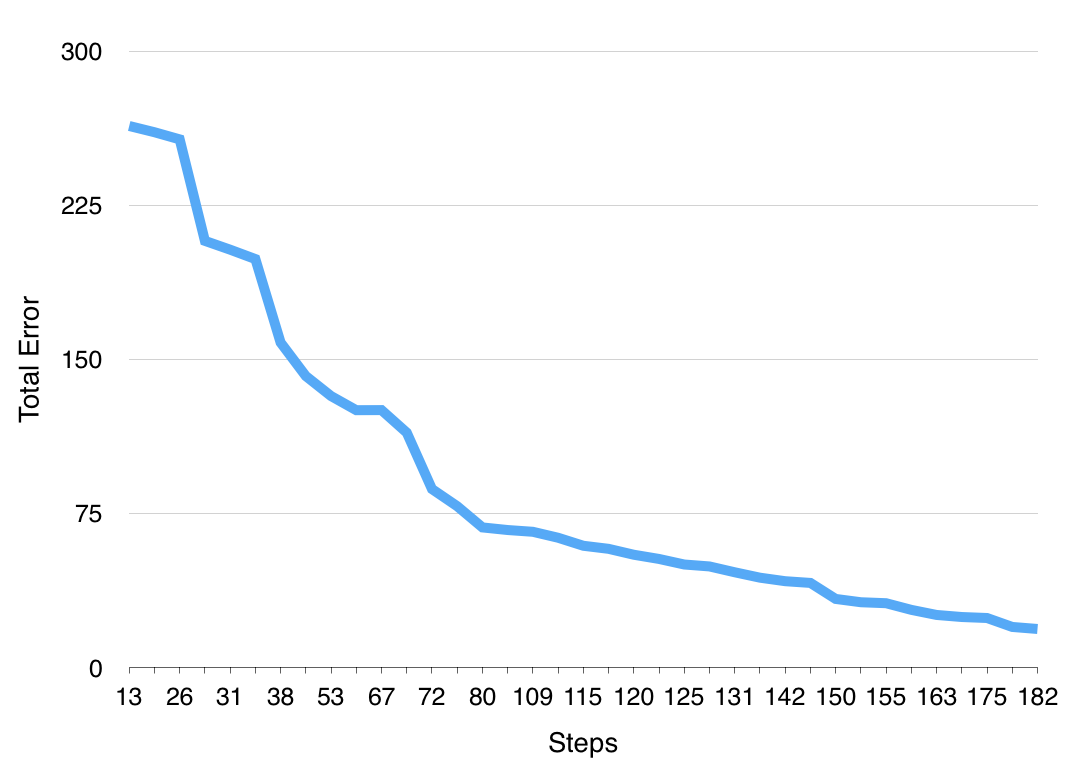

In [293]:
from IPython.display import Image

Image(filename='img1.PNG', width=500)

## 2c Implement optimization and plot train error and test error

In [199]:
n = train_feature.values.shape[0] 

W = np.eye(6906)

# shows updating info occasionally, not everytime, just to make sure the algorithm runs normally
W = fit_batch(W, Matrix, train_feature.values, n, verbose=True)

Updated W at step 109
Updated W at step 149
Updated W at step 179
Updated W at step 259
Updated W at step 289
Updated W at step 379
Updated W at step 509
Updated W at step 559
Updated W at step 579
Updated W at step 619
Updated W at step 629
Updated W at step 729
Updated W at step 869
Updated W at step 929
Updated W at step 1029
Updated W at step 1069
Updated W at step 1089
Updated W at step 1219
Updated W at step 1249
Updated W at step 1329
Updated W at step 1469
Updated W at step 1489
Updated W at step 1499
Updated W at step 1589
Updated W at step 1769
Updated W at step 1839
Updated W at step 1979
Updated W at step 2079
Updated W at step 2109
Updated W at step 2199
Updated W at step 2249
Updated W at step 2349
Updated W at step 2359
Updated W at step 2389
Updated W at step 2429
Updated W at step 2519
Updated W at step 2649
Updated W at step 2709
Updated W at step 2719
Updated W at step 2799
Updated W at step 2969
Updated W at step 3179
Updated W at step 3359
Updated W at step 3379
Up

In [206]:
print W[0:10,0:10]

[[  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00  -1.98662310e-04   0.00000000e+00
    0.00000000e+00   1.00000000e+00   0.00000

In [201]:
# store the W
np.savetxt("W_result.txt", W)

In [23]:
def predict_evaluate(W, X, data, n):
    result = np.empty((n,), dtype='bool')
    for jj in xrange(n):
        p_ind2 = data[jj,:][0]
        pos_ind2 = data[jj,:][1]
        neg_ind2 = data[jj,:][2]
        
        p = X[p_ind2].toarray().reshape(-1)
        p_pos = X[pos_ind2].toarray().reshape(-1)
        p_neg = X[neg_ind2].toarray().reshape(-1)
                
        if (p.dot(W).dot(p_pos) > p.dot(W).dot(p_neg)):
            result[jj] = True
#             print jj, result[jj], "boo"

    return result

In [ ]:
W = np.loadtxt("W_result.txt")

In [268]:
## need a way to calculate train err and test err
n = train_feature.values.shape[0]
train_result = predict_evaluate(W, Matrix, train_feature.values, n)

In [275]:
print "the training accuracy is =", (1.0 * (sum(train_result))/len(train_result))

the training accuracy is = 0.97838291047


In [273]:
n = test_feature.values.shape[0] 
test_result = predict_evaluate(W, Matrix, test_feature.values, n)

In [276]:
print "the testing accuracy is =",(1.0 * sum(test_result) / len(test_result))

the testing accuracy is = 0.958734324876


In [277]:
print "the training error is =", 1-(1.0 * (sum(train_result))/len(train_result))
print "the test error is =", 1-(1.0 * (sum(test_result))/len(test_result))

the training error is = 0.0216170895305
the test error is = 0.0412656751239


> Ploting train err verses iterations

Because lack of time, we design a scheme that only use a small subsample of data in order to show you the pattern.

We decided to use size of 1200 as training, and size of 400 as test. To implement that, we need to modify the util function we defined before. As follows

In [289]:
np.arange(200, 1450, 250)

array([ 200,  450,  700,  950, 1200])

In [290]:
def main():
    train_err_collection = []
    test_err_collection = []

    for n in np.arange(200, 1450, 250):
        
        W = np.eye(6906)

        # shows updating info occasionally, not everytime, just to make sure the algorithm runs normally
        W = fit_batch(W, Matrix, train_feature.values, n, verbose=False)

        train_result = predict_evaluate(W, Matrix, train_feature.values, 1200)
        test_result = predict_evaluate(W, Matrix, test_feature.values, 200)

        train_err = 1-(1.0 * (sum(train_result))/len(train_result))
        test_err = 1-(1.0 * (sum(test_result))/len(test_result))
        train_err_collection.append(train_err)
        test_err_collection.append(test_err)
        print "the training error is =", train_err
        print "the test error is =", test_err
        print "\n"
        
    return train_err_collection, test_err_collection

In [291]:
train_err_collection, test_err_collection = main()

the training error is = 0.0575
the test error is = 0.0


the training error is = 0.0325
the test error is = 0.0


the training error is = 0.0308333333333
the test error is = 0.0


the training error is = 0.025
the test error is = 0.0


the training error is = 0.00666666666667
the test error is = 0.0




## 3a Enforce W matrix to be symm

In [307]:
W = np.loadtxt("W_result.txt")

In [308]:
def symmetrize(W):
    return 0.5 * (W + W.T)

In [313]:
test = np.array([(1,2),(1,2)])
test = symmetrize(test)
test

array([[ 1. ,  1.5],
       [ 1.5,  2. ]])

In [314]:
W = symmetrize(W)
## need a way to calculate train err and test err
n = train_feature.values.shape[0]
train_result = predict_evaluate(W, Matrix, train_feature.values, n)

n = test_feature.values.shape[0] 
test_result = predict_evaluate(W, Matrix, test_feature.values, n)

print "the training error is =", 1-(1.0 * (sum(train_result))/len(train_result))
print "the test error is =", 1-(1.0 * (sum(test_result))/len(test_result))

the training error is = 0.0976596675416
the test error is = 0.111256926218


## 4a Enforce PSD

In [294]:
# def make_psd(W):
#     """ Make matrix positive semi-definite. """
#     w, v = np.linalg.eig(0.5 * (W + W.T))  # eigvec in columns
#     D = np.diagflat(np.maximum(w, 0))
#     W[:] = np.dot(np.dot(v, D), v.T)

In [2]:
W = np.loadtxt("W_result.txt")

In [3]:
w, v = np.linalg.eig(0.5 * (W + W.T))

In [7]:
D = np.linalg.cholesky(np.diagflat(w[0:5])).astype(float)

/Users/jiajiechen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


In [16]:
W = v[:,0:5].astype(float).dot(D).dot(v[:,0:5].astype(float).T)

/Users/jiajiechen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


In [25]:
## need a way to calculate train err and test err
n = train_feature.values.shape[0]
train_result = predict_evaluate(W, Matrix, train_feature.values, n)
print "the training accuracy is =", (1.0 * (sum(train_result))/len(train_result))

n = test_feature.values.shape[0] 
test_result = predict_evaluate(W, Matrix, test_feature.values, n)
print "the testing accuracy is =",(1.0 * sum(test_result) / len(test_result))

the training accuracy is = 0.858012540099
the testing accuracy is = 0.800816564596


In [26]:
print "the training error is =", 1-(1.0 * (sum(train_result))/len(train_result))
print "the test error is =", 1-(1.0 * (sum(test_result))/len(test_result))

the training error is = 0.141987459901
the test error is = 0.199183435404


In [33]:
B = v[:,0:5].astype(float).dot(D)
#somehow when I free the memory, I loss v and w, so I cannot show you B here, but it should be constructed as above.

1